In [ ]:
import scipy
print(scipy.__version__)
from google.colab import drive
drive.mount('/content/drive')
from scipy.io import loadmat
# 加载MATLAB文件
filename = '/content/drive/MyDrive/'
# 导入必要的库
import pandas as pd


1.11.4
Mounted at /content/drive


In [ ]:
data_path = filename + 'click_rate/train.csv'
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
from torch.utils.data import DataLoader, TensorDataset
from IPython.display import display

# 加载数据集
data = pd.read_csv(data_path)
# 填补缺失值
# 处理性别列，将空值填充为1，然后将性别转换为数值
data['gender'] = data['gender'].fillna('Female').map({'Female': 1, 'Male': 0})
data = data.fillna(-1)
# 表格化展示前五行数据
display(data.head(5))

,id,date,user_id,product,campaign_id,webpage_id,product_category_id,user_group_id,gender,age_level,user_depth,var_1,isClick
0,0,07-02 00:00,0,0,0,0,0,10.0,1,4.0,3.0,0,0
1,1,07-02 00:00,1,0,1,1,1,8.0,1,2.0,2.0,0,0
2,2,07-02 00:00,1,0,0,0,0,8.0,1,2.0,2.0,0,0
3,3,07-02 00:00,2,1,0,0,2,3.0,0,3.0,3.0,1,0
4,4,07-02 00:01,3,0,2,2,2,2.0,0,2.0,3.0,1,0


In [ ]:
# 处理日期列，将日期转换为小时表示
data['hour'] = pd.to_datetime(data['date'], format='%m-%d %H:%M').dt.hour


# 删除原始日期列
data = data.drop(columns=['date'])

# 确保所有列都是数值类型
data = data.apply(pd.to_numeric)

# 表格化展示前五行数据
display(data.head(5))

,id,user_id,product,campaign_id,webpage_id,product_category_id,user_group_id,gender,age_level,user_depth,var_1,isClick,hour
0,0,0,0,0,0,0,10.0,1,4.0,3.0,0,0,0
1,1,1,0,1,1,1,8.0,1,2.0,2.0,0,0,0
2,2,1,0,0,0,0,8.0,1,2.0,2.0,0,0,0
3,3,2,1,0,0,2,3.0,0,3.0,3.0,1,0,0
4,4,3,0,2,2,2,2.0,0,2.0,3.0,1,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
# 编码类别特征
categorical_columns = ['product', 'campaign_id', 'webpage_id', 'product_category_id', 'user_group_id', 'var_1']
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# 分离特征和标签
X = data.drop(columns=['isClick','id'])
y = data['isClick']
print(X)

        user_id  product  campaign_id  webpage_id  product_category_id  \
0             0        0            0           0                    0   
1             1        0            1           1                    1   
2             1        0            0           0                    0   
3             2        1            0           0                    2   
4             3        0            2           2                    2   
...         ...      ...          ...         ...                  ...   
391820    44038        1            9           8                    0   
391821   135658        3            9           8                    1   
391822   135658        3            9           8                    1   
391823    39562        0            3           0                    1   
391824    39562        0            0           0                    0   

        user_group_id  gender  age_level  user_depth  var_1  hour  
0                  11       1        4.0   

In [ ]:


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# 假设 X 和 y 已经定义
# 分割数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,shuffle=False)
# # 将训练集和标签合并，方便处理
# train_data = pd.concat([X_train, y_train], axis=1)

# # 筛选出 y 值为 1 的样本
# train_data_pos = train_data[train_data[y_train.name] == 1]

# # 从训练集中随机采样与 y 值为 1 的样本数量相等的 y 值为 0 的样本
# train_data_neg = train_data[train_data[y_train.name] == 0].sample(n=len(train_data_pos), random_state=40)


# # 合并正负样本，构成新的平衡训练集
# train_data_balanced = pd.concat([train_data_pos, train_data_neg])

# # 随机打乱平衡后的训练集
# train_data_balanced = train_data_balanced.sample(frac=1, random_state=40).reset_index(drop=True)

# # 从平衡训练集中分离出特征和标签
# X_train_balanced = train_data_balanced.drop(columns=[y_train.name])
# y_train_balanced = train_data_balanced[y_train.name]
# 转换为Tensor
X_train_tensor = torch.tensor(X_train.values, dtype=torch.long)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.long)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# 构建DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# 表格化展示前五行数据
print(X_train_tensor)
print(y_train_tensor[:100])
display(X.head(500))

tensor([[     0,      0,      0,  ...,      3,      0,      0],
        [     1,      0,      1,  ...,      2,      0,      0],
        [     1,      0,      0,  ...,      2,      0,      0],
        ...,
        [ 49579,      1,      3,  ...,      3,      0,     18],
        [111810,      4,      8,  ...,      3,      0,     18],
        [ 34522,      5,      5,  ...,      3,      0,     18]])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


,user_id,product,campaign_id,webpage_id,product_category_id,user_group_id,gender,age_level,user_depth,var_1,hour
0,0,0,0,0,0,11,1,4.0,3.0,0,0
1,1,0,1,1,1,9,1,2.0,2.0,0,0
2,1,0,0,0,0,9,1,2.0,2.0,0,0
3,2,1,0,0,2,4,0,3.0,3.0,1,0
4,3,0,2,2,2,3,0,2.0,3.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
495,288,8,4,3,4,2,0,1.0,3.0,0,1
496,111,1,0,0,2,3,0,2.0,3.0,1,1
497,289,1,4,3,4,2,0,1.0,2.0,0,1
498,290,1,0,0,2,3,0,2.0,3.0,1,1


In [ ]:
import numpy as np

# 计算基准准确率
def calculate_baseline_accuracy(y_train, y_test):
    # 基于多数类别的预测
    majority_class_train = np.bincount(y_train).argmax()
    majority_class_test = np.bincount(y_test).argmax()

    # 计算准确率
    train_accuracy = np.mean(y_train == majority_class_train)
    test_accuracy = np.mean(y_test == majority_class_test)

    print(f"Train Baseline Accuracy: {train_accuracy:.9f}")
    print(f"Test Baseline Accuracy: {test_accuracy:.9f}")

# 转换为整数类型的numpy数组
y_train_np = y_train_tensor.numpy().astype(int)
y_test_np = y_test_tensor.numpy().astype(int)

# 计算基准准确率
calculate_baseline_accuracy(y_train_np, y_test_np)

Train Baseline Accuracy: 0.928780949
Test Baseline Accuracy: 0.938738426


In [ ]:
import torch
from torch import nn

class MLP_Block(nn.Module):
    def __init__(self, input_dim, hidden_units, hidden_activations="ReLU", output_activation=None, dropout_rates=0.0, batch_norm=False):
        super(MLP_Block, self).__init__()
        self.layers = nn.ModuleList()
        for hidden_unit in hidden_units:
            self.layers.append(nn.Linear(input_dim, hidden_unit))
            if batch_norm:
                self.layers.append(nn.BatchNorm1d(hidden_unit))
            self.layers.append(getattr(nn, hidden_activations)())
            self.layers.append(nn.Dropout(dropout_rates))
            input_dim = hidden_unit
        self.output_activation = output_activation

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        if self.output_activation:
            x = getattr(nn, self.output_activation)()(x)
        return x

class FeatureEmbedding(nn.Module):
    def __init__(self, feature_map, embedding_dim):
        super(FeatureEmbedding, self).__init__()
        self.embeddings = nn.ModuleDict({
            feature: nn.Embedding(num_categories, embedding_dim)
            for feature, num_categories in feature_map.items()
        })

    def forward(self, x):
        embedded_features = [self.embeddings[feature](x[:, i])
                             for i, feature in enumerate(self.embeddings)]
        return torch.cat(embedded_features, dim=1)

class FeatureSelection(nn.Module):
    def __init__(self, feature_map, feature_dim, embedding_dim, fs_hidden_units=[], fs1_context=[], fs2_context=[]):
        super(FeatureSelection, self).__init__()
        self.fs1_context = fs1_context
        if len(fs1_context) == 0:
            self.fs1_ctx_bias = nn.Parameter(torch.zeros(1, embedding_dim))
        else:
            self.fs1_ctx_emb = FeatureEmbedding(feature_map, embedding_dim)

        self.fs2_context = fs2_context
        if len(fs2_context) == 0:
            self.fs2_ctx_bias = nn.Parameter(torch.zeros(1, embedding_dim))
        else:
            self.fs2_ctx_emb = FeatureEmbedding(feature_map, embedding_dim)

        self.fs1_gate = MLP_Block(input_dim=embedding_dim * max(1, len(fs1_context)),
                                  hidden_units=[200, feature_dim],  # 调整为 feature_dim
                                  hidden_activations="ReLU",
                                  output_activation="Sigmoid",
                                  batch_norm=False)

        self.fs2_gate = MLP_Block(input_dim=embedding_dim * max(1, len(fs2_context)),
                                  hidden_units=[200, feature_dim],  # 调整为 feature_dim
                                  hidden_activations="ReLU",
                                  output_activation="Sigmoid",
                                  batch_norm=False)

    def forward(self, X, flat_emb):
        if len(self.fs1_context) == 0:
            fs1_input = self.fs1_ctx_bias.repeat(flat_emb.size(0), 1)
        else:
            fs1_input = self.fs1_ctx_emb(X).flatten(start_dim=1)

        gt1 = self.fs1_gate(fs1_input) * 2
        feature1 = flat_emb * gt1

        if len(self.fs2_context) == 0:
            fs2_input = self.fs2_ctx_bias.repeat(flat_emb.size(0), 1)
        else:
            fs2_input = self.fs2_ctx_emb(X).flatten(start_dim=1)

        gt2 = self.fs2_gate(fs2_input) * 2
        feature2 = flat_emb * gt2

        return feature1, feature2

class InteractionAggregation(nn.Module):
    def __init__(self, x_dim, y_dim, output_dim=1, num_heads=1):
        super(InteractionAggregation, self).__init__()
        # print(x_dim)
        # print(y_dim)
        assert x_dim % num_heads == 0 and y_dim % num_heads == 0, "Input dim must be divisible by num_heads!"
        self.num_heads = num_heads
        self.output_dim = output_dim
        self.head_x_dim = x_dim // num_heads
        self.head_y_dim = y_dim // num_heads
        self.w_x = nn.Linear(x_dim, output_dim)
        self.w_y = nn.Linear(y_dim, output_dim)
        self.w_xy = nn.Parameter(torch.Tensor(num_heads * self.head_x_dim * self.head_y_dim, output_dim))
        nn.init.xavier_normal_(self.w_xy)

    def forward(self, x, y):
        output = self.w_x(x) + self.w_y(y)
        head_x = x.view(-1, self.num_heads, self.head_x_dim)
        head_y = y.view(-1, self.num_heads, self.head_y_dim)
        xy = torch.matmul(torch.matmul(head_x.unsqueeze(2), self.w_xy.view(self.num_heads, self.head_x_dim, -1)).view(-1, self.num_heads, self.output_dim, self.head_y_dim), head_y.unsqueeze(-1)).squeeze(-1)
        output += xy.sum(dim=1)
        return output

class FinalMLP(nn.Module):
    def __init__(self, feature_map, embedding_dim=10, mlp1_hidden_units=[64, 64, 64], mlp1_hidden_activations="ReLU", mlp1_dropout=0,
                 mlp1_batch_norm=False, mlp2_hidden_units=[64, 64, 64], mlp2_hidden_activations="ReLU", mlp2_dropout=0,
                 mlp2_batch_norm=False, use_fs=True, fs_hidden_units=[64], fs1_context=[], fs2_context=[], num_heads=1):
        super(FinalMLP, self).__init__()
        self.embedding_layer = FeatureEmbedding(feature_map, embedding_dim)
        feature_dim = embedding_dim * len(feature_map)
        self.mlp1 = MLP_Block(input_dim=feature_dim, hidden_units=mlp1_hidden_units, hidden_activations=mlp1_hidden_activations,
                              output_activation=None, dropout_rates=mlp1_dropout, batch_norm=mlp1_batch_norm)
        self.mlp2 = MLP_Block(input_dim=feature_dim, hidden_units=mlp2_hidden_units, hidden_activations=mlp2_hidden_activations,
                              output_activation=None, dropout_rates=mlp2_dropout, batch_norm=mlp2_batch_norm)
        self.use_fs = use_fs
        if self.use_fs:
            self.fs_module = FeatureSelection(feature_map, feature_dim, embedding_dim, fs_hidden_units, fs1_context, fs2_context)
        self.fusion_module = InteractionAggregation(mlp1_hidden_units[-1], mlp2_hidden_units[-1], output_dim=1, num_heads=num_heads)
        self.sigmoid = nn.Sigmoid()

    def forward(self, X):
        X = X.long()
        X = torch.clamp(X, 0, self.embedding_layer.embeddings[next(iter(self.embedding_layer.embeddings))].num_embeddings - 1)
        flat_emb = self.embedding_layer(X).flatten(start_dim=1)
        # print(flat_emb.shape)
        if self.use_fs:
            feat1, feat2 = self.fs_module(X, flat_emb)
        else:
            feat1, feat2 = flat_emb, flat_emb
        y_pred = self.fusion_module(self.mlp1(feat1), self.mlp2(feat2))
        y_pred = self.sigmoid(y_pred)
        return y_pred


In [ ]:
# 定义特征映射 (Feature Map)
feature_map = {col: len(data[col].unique()) for col in X.columns}
print(feature_map)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# 构建模型实例
model = FinalMLP(feature_map=feature_map, embedding_dim=10, mlp1_hidden_units=[200, 200, 200], mlp1_hidden_activations="ReLU",
                 mlp1_dropout=0.5, mlp1_batch_norm=True, mlp2_hidden_units=[400], mlp2_hidden_activations="ReLU",
                 mlp2_dropout=0.5, mlp2_batch_norm=True, use_fs=True, fs_hidden_units=[64],
                 fs1_context=[], fs2_context=[], num_heads=10).to(device)
# 构建 DataLoader
train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=100, shuffle=False)

{'user_id': 135659, 'product': 10, 'campaign_id': 10, 'webpage_id': 9, 'product_category_id': 5, 'user_group_id': 14, 'gender': 2, 'age_level': 8, 'user_depth': 4, 'var_1': 2, 'hour': 24}
Using device: cuda


Epoch 1, Train Loss: 0.069544, Train Accuracy: 0.974124
Epoch 1, Val Loss: 1.037888716, Val Accuracy: 0.742519677
Epoch 2, Train Loss: 0.068193, Train Accuracy: 0.974570
Epoch 2, Val Loss: 1.046555509, Val Accuracy: 0.763334933
Epoch 3, Train Loss: 0.067567, Train Accuracy: 0.974604
Epoch 3, Val Loss: 1.070735482, Val Accuracy: 0.759925273
Epoch 4, Train Loss: 0.066702, Train Accuracy: 0.975087
Epoch 4, Val Loss: 1.032604598, Val Accuracy: 0.749910675
Epoch 5, Train Loss: 0.065237, Train Accuracy: 0.975577
Epoch 5, Val Loss: 1.030109847, Val Accuracy: 0.761191135


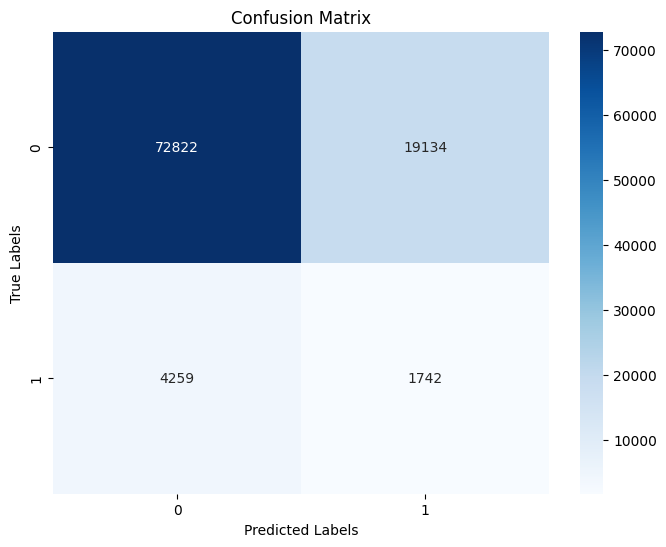

F1 Score: 0.1296
Epoch 6, Train Loss: 0.065775, Train Accuracy: 0.975278
Epoch 6, Val Loss: 1.104005602, Val Accuracy: 0.744949314
Epoch 7, Train Loss: 0.064239, Train Accuracy: 0.975945
Epoch 7, Val Loss: 1.090070397, Val Accuracy: 0.748226263
Epoch 8, Train Loss: 0.063689, Train Accuracy: 0.976282
Epoch 8, Val Loss: 1.119287273, Val Accuracy: 0.737782905
Epoch 9, Train Loss: 0.062791, Train Accuracy: 0.976370
Epoch 9, Val Loss: 1.097601530, Val Accuracy: 0.744928897
Epoch 10, Train Loss: 0.062038, Train Accuracy: 0.976489
Epoch 10, Val Loss: 1.117808257, Val Accuracy: 0.751013200


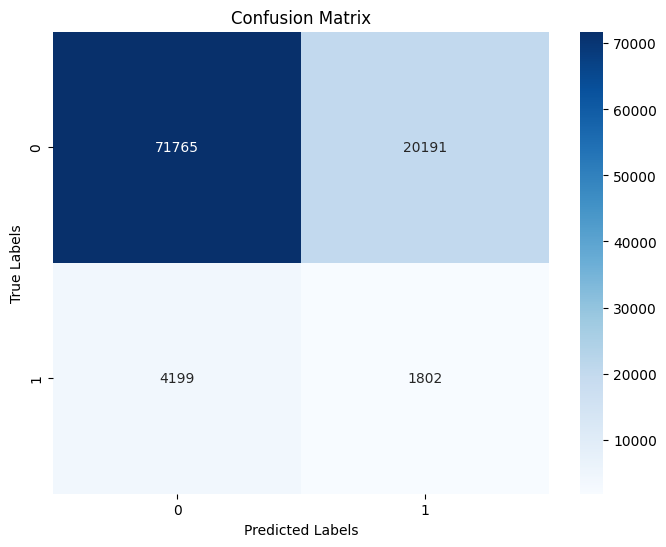

F1 Score: 0.1287
Epoch 11, Train Loss: 0.061073, Train Accuracy: 0.977105
Epoch 11, Val Loss: 1.180868998, Val Accuracy: 0.739661280
Epoch 12, Train Loss: 0.061427, Train Accuracy: 0.976928
Epoch 12, Val Loss: 1.131718756, Val Accuracy: 0.745194320
Epoch 13, Train Loss: 0.060210, Train Accuracy: 0.977276
Epoch 13, Val Loss: 1.118936920, Val Accuracy: 0.750319018
Epoch 14, Train Loss: 0.059183, Train Accuracy: 0.977504
Epoch 14, Val Loss: 1.176187824, Val Accuracy: 0.746092673
Epoch 15, Train Loss: 0.058963, Train Accuracy: 0.977755
Epoch 15, Val Loss: 1.166875001, Val Accuracy: 0.763375767


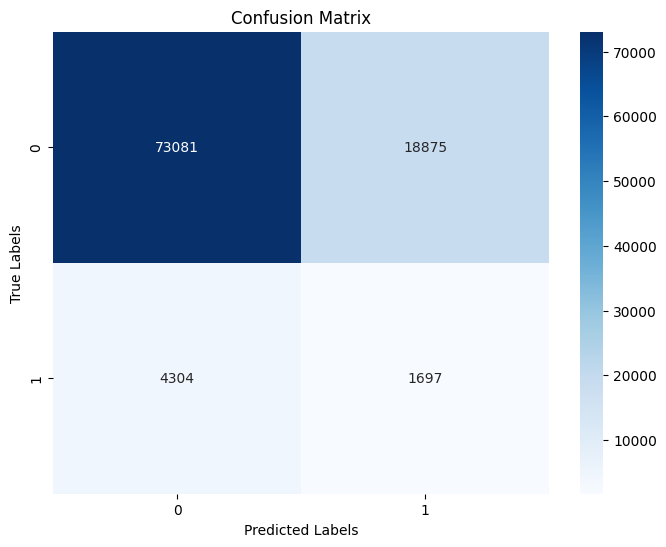

F1 Score: 0.1277
Epoch 16, Train Loss: 0.058225, Train Accuracy: 0.978041
Epoch 16, Val Loss: 1.178424654, Val Accuracy: 0.753636800
Epoch 17, Train Loss: 0.057110, Train Accuracy: 0.978426
Epoch 17, Val Loss: 1.281442874, Val Accuracy: 0.747184989
Epoch 18, Train Loss: 0.057251, Train Accuracy: 0.978456
Epoch 18, Val Loss: 1.282652603, Val Accuracy: 0.734199700
Epoch 19, Train Loss: 0.056074, Train Accuracy: 0.978773
Epoch 19, Val Loss: 1.246520743, Val Accuracy: 0.725951183
Epoch 20, Train Loss: 0.055466, Train Accuracy: 0.978980
Epoch 20, Val Loss: 1.260754148, Val Accuracy: 0.743469073


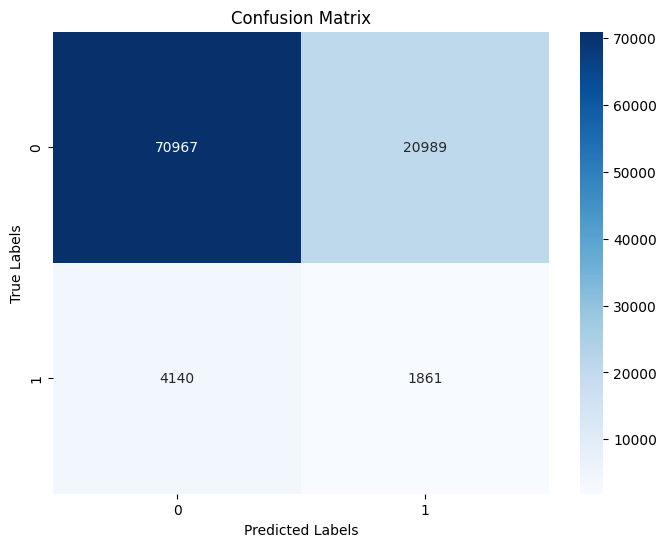

F1 Score: 0.1290


In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.1)

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    train_loss, train_correct, train_total = 0, 0, 0

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch).squeeze()
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        predicted = (outputs > 0.5).float()  # Applying threshold to get binary output
        train_total += y_batch.size(0)
        train_correct += (predicted == y_batch).sum().item()

    train_accuracy = train_correct / train_total
    print(f'Epoch {epoch+1}, Train Loss: {train_loss / len(train_loader):.6f}, Train Accuracy: {train_accuracy:.6f}')

    model.eval()
    val_loss, val_correct, val_total = 0, 0, 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch).squeeze()
            loss = criterion(outputs, y_batch)
            val_loss += loss.item()
            predicted = (outputs > 0.5).float()  # Applying threshold to get binary output
            val_total += y_batch.size(0)
            val_correct += (predicted == y_batch).sum().item()

    val_accuracy = val_correct / val_total
    print(f'Epoch {epoch+1}, Val Loss: {val_loss / len(test_loader):.9f}, Val Accuracy: {val_accuracy:.9f}')
    if (epoch+1)%5 == 0:
              # Switch the model to evaluation mode
        model.eval()

        # Initialize lists to store true labels and predictions
        all_labels = []
        all_preds = []
        # Disable gradient calculation
        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                outputs = model(X_batch).squeeze()
                predicted = (outputs > 0.5).float()  # Applying threshold to get binary output
                all_labels.extend(y_batch.cpu().numpy())
                all_preds.extend(predicted.cpu().numpy())

        # Compute the confusion matrix
        cm = confusion_matrix(all_labels, all_preds)

        # Plot the confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.title('Confusion Matrix')
        plt.show()

        def calculate_f1(y_true, y_pred):
            # 计算混淆矩阵
            cm = confusion_matrix(y_true, y_pred)

            # 提取TP, FP, FN, TN
            TP = cm[1, 1]
            FP = cm[0, 1]
            FN = cm[1, 0]

            # 计算Precision和Recall
            precision = TP / (TP + FP) if (TP + FP) > 0 else 0
            recall = TP / (TP + FN) if (TP + FN) > 0 else 0

            # 计算F1得分
            f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
            return f1

        # Calculate F1 score
        f1_score = calculate_f1(all_labels, all_preds)
        print(f"F1 Score: {f1_score:.4f}")

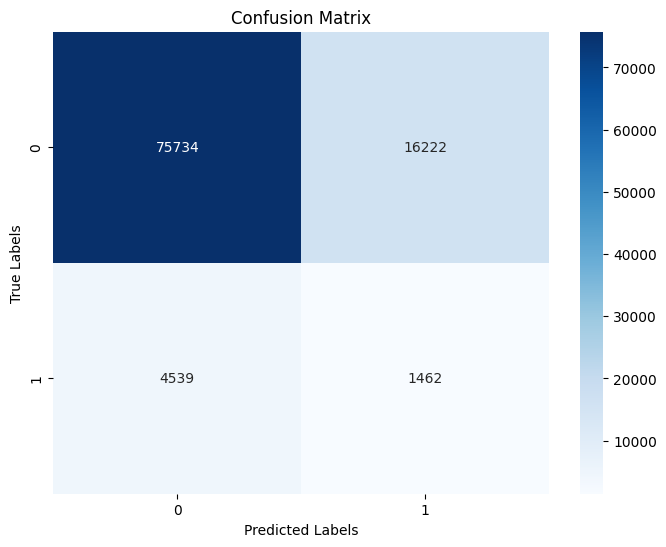

F1 Score: 0.1235


In [ ]:
import torch
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Switch the model to evaluation mode
model.eval()

# Initialize lists to store true labels and predictions
all_labels = []
all_preds = []
# Disable gradient calculation
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = model(X_batch).squeeze()
        predicted = (outputs > 0.5).float()  # Applying threshold to get binary output
        all_labels.extend(y_batch.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

# Compute the confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

def calculate_f1(y_true, y_pred):
    # 计算混淆矩阵
    cm = confusion_matrix(y_true, y_pred)

    # 提取TP, FP, FN, TN
    TP = cm[1, 1]
    FP = cm[0, 1]
    FN = cm[1, 0]

    # 计算Precision和Recall
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0

    # 计算F1得分
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    return f1

# Calculate F1 score
f1_score = calculate_f1(all_labels, all_preds)
print(f"F1 Score: {f1_score:.4f}")


In [ ]:
torch.save(model.state_dict(), 'model_state_dict.pth')